In [ ]:
#import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#sql
from sqlalchemy import create_engine
from sqlalchemy import inspect

In [ ]:
# sqlite3
import sqlite3 as sql

In [ ]:
# crete database and import
conn = sql.connect('database.db')
# import food maanagement data
provider_data = pd.read_csv('providers_data.csv')
receivers_data = pd.read_csv('receivers_data.csv')
food_listings_data=pd.read_excel('food_listings_data.xlsx')
claims_data=pd.read_csv('claims_data.csv')

In [ ]:
print(provider_data.info())
print(claims_data.info())
print(food_listings_data.info())
print(receivers_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provider_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   Address      1000 non-null   object
 4   City         1000 non-null   object
 5   Contact      1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Claim_ID     1000 non-null   int64 
 1   Food_ID      1000 non-null   int64 
 2   Receiver_ID  1000 non-null   int64 
 3   Status       1000 non-null   object
 4   Timestamp    1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries,

In [64]:
# check duplicate value
print(provider_data.duplicated().sum())
print(receivers_data.duplicated().sum())
print(food_listings_data.duplicated().sum())
print(claims_data.duplicated().sum())

0
0
0
0


In [ ]:
# expairy date convert date column
food_listings_data['Expiry_Date'] = pd.to_datetime(food_listings_data['Expiry_Date'])
food_listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Food_ID        1000 non-null   int64         
 1   Food_Name      1000 non-null   object        
 2   Quantity       1000 non-null   int64         
 3   Expiry_Date    1000 non-null   datetime64[ns]
 4   Provider_ID    1000 non-null   int64         
 5   Provider_Type  1000 non-null   object        
 6   Location       1000 non-null   object        
 7   Meal_Type      1000 non-null   object        
 8   Food_type      1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 70.4+ KB


In [ ]:
claims_data['Timestamp'] = pd.to_datetime(claims_data['Timestamp'])
claims_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Claim_ID     1000 non-null   int64         
 1   Food_ID      1000 non-null   int64         
 2   Receiver_ID  1000 non-null   int64         
 3   Status       1000 non-null   object        
 4   Timestamp    1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 39.2+ KB


In [ ]:
provider_data.to_sql('provider_data', conn, if_exists='replace', index=False)
receivers_data.to_sql('receivers_data', conn, if_exists='replace', index=False)
food_listings_data.to_sql('food_listings_data', conn, if_exists='replace', index=False)
claims_data.to_sql('claims_data', conn, if_exists='replace', index=False)

1000

In [ ]:
# Get a list of all tables in the database
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the tables
print("Tables in the database:")
for table in tables:
    print(table[0])
    # Select the first 5 rows from each table
    query = f"SELECT * FROM {table[0]} LIMIT 5;"
    df = pd.read_sql(query, conn)
    display(df)

Tables in the database:
provider_data


Provider_ID                         Name           Type  \
0            1             Gonzales-Cochran    Supermarket   
1            2  Nielsen, Johnson and Fuller  Grocery Store   
2            3                 Miller-Black    Supermarket   
3            4   Clark, Prince and Williams  Grocery Store   
4            5               Coleman-Farley  Grocery Store   

                                             Address            City  \
0  74347 Christopher Extensions\nAndreamouth, OK ...     New Jessica   
1           91228 Hanson Stream\nWelchtown, OR 27136     East Sheena   
2  561 Martinez Point Suite 507\nGuzmanchester, W...  Lake Jesusview   
3     467 Bell Trail Suite 409\nPort Jesus, IA 61188     Mendezmouth   
4  078 Matthew Creek Apt. 319\nSaraborough, MA 53978   Valentineside   

                Contact  
0       +1-600-220-0480  
1  +1-925-283-8901x6297  
2      001-517-295-2206  
3      556.944.8935x401  
4          193.714.6577

receivers_data


Receiver_ID          Name        Type               City           Contact
0            1  Donald Gomez     Shelter     Port Carlburgh     (955)922-5295
1            2  Laurie Ramos  Individual         Lewisburgh      761.042.1570
2            3  Ashley Mckee         NGO  South Randalltown  691-023-0094x856
3            4    Erika Rose         NGO   South Shaneville        8296491111
4            5   John Romero  Individual          Bakerport      067.491.0154

food_listings_data


Food_ID Food_Name  Quantity          Expiry_Date  Provider_ID  \
0        1     Bread        43  2025-03-17 00:00:00          110   
1        2      Soup        22  2025-03-24 00:00:00          791   
2        3    Fruits        46  2025-03-28 00:00:00          478   
3        4    Fruits        15  2025-03-16 00:00:00          930   
4        5      Soup        14  2025-03-19 00:00:00          279   

      Provider_Type          Location  Meal_Type            Food_type  
0     Grocery Store  South Kellyville  Breakfast                Vegan  
1     Grocery Store        West James     Dinner  Vegan or Vegetarian  
2  Catering Service       Lake Regina  Breakfast                Vegan  
3        Restaurant         Kellytown      Lunch                Vegan  
4        Restaurant        Garciaport     Dinner  Vegan or Vegetarian

claims_data


Claim_ID  Food_ID  Receiver_ID     Status            Timestamp
0         1      164          908    Pending  2025-03-05 05:26:00
1         2      353          391  Cancelled  2025-03-11 10:24:00
2         3      626          492  Completed  2025-03-21 00:59:00
3         4       61          933  Cancelled  2025-03-04 09:08:00
4         5      345          229    Pending  2025-03-14 15:17:00

In [ ]:
from sqlalchemy import create_engine, inspect, text

engine = create_engine('sqlite:///database.db')


# Use the inspect function to get information about the database
inspector = inspect(engine)

# Get the table names
table_names = inspector.get_table_names()

# Print the schema for each table
for table_name in table_names:
    print(f"\nSchema for table: {table_name}")
    for column in inspector.get_columns(table_name):
        print(f"Column: {column['name']}, Type: {column['type']}")

    # You can also inspect foreign keys to see relationships
    foreign_keys = inspector.get_foreign_keys(table_name)
    if foreign_keys:
        print(f"Foreign Keys for table: {table_name}")
        for fk in foreign_keys:
            print(f"  {fk['constrained_columns']} -> {fk['referred_table']}.{fk['referred_columns']}")


Schema for table: claims_data
Column: Claim_ID, Type: INTEGER
Column: Food_ID, Type: INTEGER
Column: Receiver_ID, Type: INTEGER
Column: Status, Type: TEXT
Column: Timestamp, Type: TIMESTAMP

Schema for table: food_listings_data
Column: Food_ID, Type: INTEGER
Column: Food_Name, Type: TEXT
Column: Quantity, Type: INTEGER
Column: Expiry_Date, Type: TIMESTAMP
Column: Provider_ID, Type: INTEGER
Column: Provider_Type, Type: TEXT
Column: Location, Type: TEXT
Column: Meal_Type, Type: TEXT
Column: Food_type, Type: TEXT

Schema for table: provider_data
Column: Provider_ID, Type: INTEGER
Column: Name, Type: TEXT
Column: Type, Type: TEXT
Column: Address, Type: TEXT
Column: City, Type: TEXT
Column: Contact, Type: TEXT

Schema for table: receivers_data
Column: Receiver_ID, Type: INTEGER
Column: Name, Type: TEXT
Column: Type, Type: TEXT
Column: City, Type: TEXT
Column: Contact, Type: TEXT


In [ ]:
# Q1 How many food providers and receivers are there in each city?
query_1 = """
SELECT
    T1.City,
    COUNT(DISTINCT T1.Provider_ID) AS Number_of_Providers,
    COUNT(DISTINCT T2.Receiver_ID) AS Number_of_Receivers
FROM provider_data AS T1
LEFT JOIN receivers_data AS T2 ON T1.City = T2.City
GROUP BY T1.City;
"""
# show result
result = pd.read_sql(query_1, conn)
result

City  Number_of_Providers  Number_of_Receivers
0            Adambury                    1                    0
1           Adamsview                    1                    0
2          Adamsville                    1                    0
3        Aguirreville                    1                    0
4    Alexanderchester                    1                    0
..                ...                  ...                  ...
958       Wrightville                    1                    0
959         Yatesside                    1                    0
960      Youngchester                    1                    0
961      Zimmermanton                    1                    0
962    Zimmermanville                    1                    0

[963 rows x 3 columns]

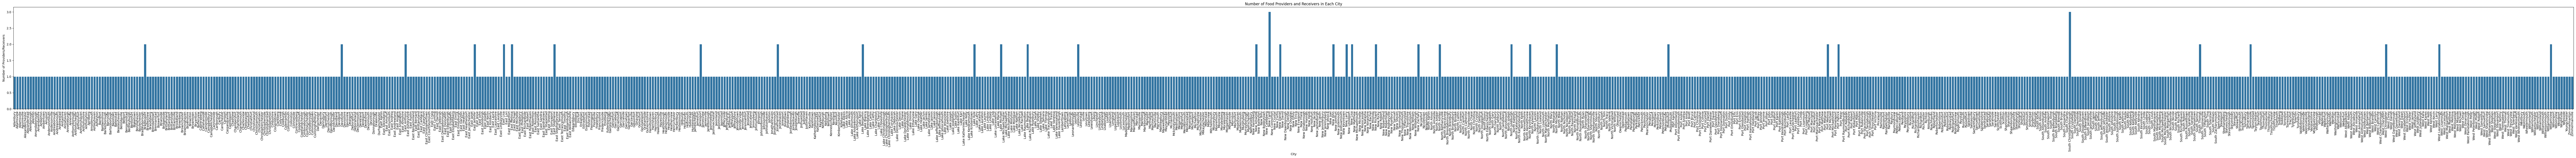

In [ ]:
#visualize query_1
plt.figure(figsize=(150, 6))
sns.barplot(x='City', y='Number_of_Providers', data=result)
plt.title('Number of Food Providers and Receivers in Each City')
plt.xlabel('City')
plt.ylabel('Number of Providers/Receivers')
plt.xticks(rotation=90)
plt.show()

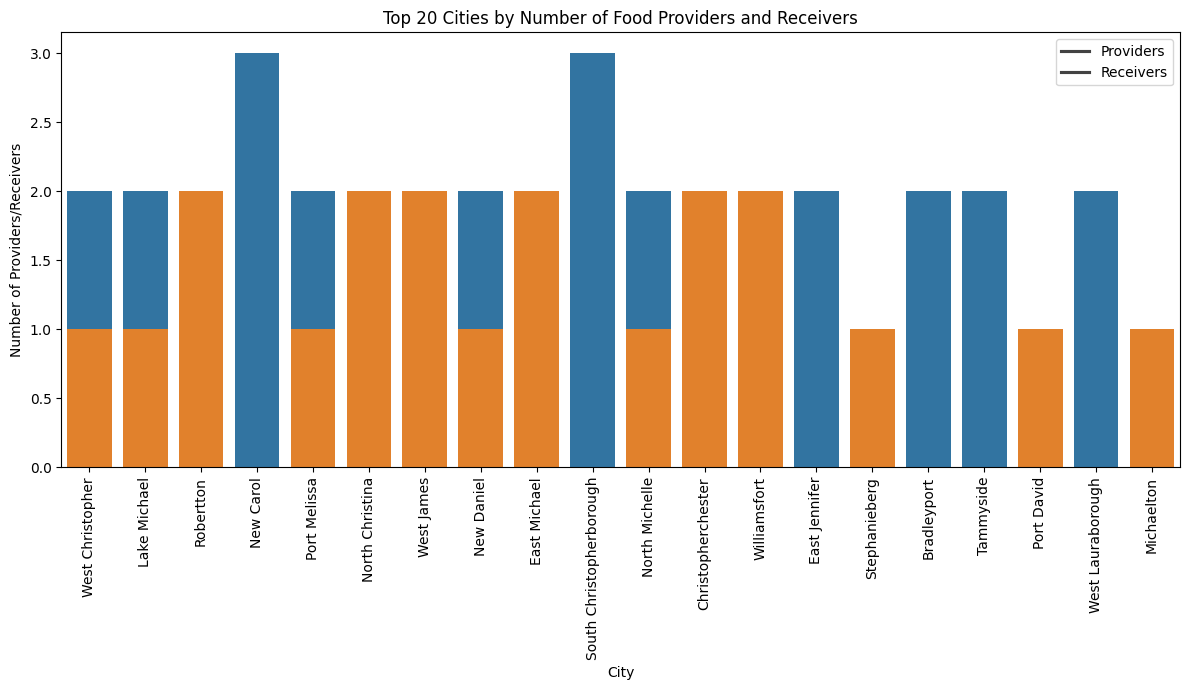

In [ ]:
# Calculate the total number of providers and receivers for sorting
result['Total_Count'] = result['Number_of_Providers'] + result['Number_of_Receivers']

# Sort by total count and get the top 20 cities
top_20_cities = result.sort_values(by='Total_Count', ascending=False).head(20)

# Visualize the top 20 cities
plt.figure(figsize=(12, 7))
sns.barplot(x='City', y='Number_of_Providers', data=top_20_cities)
sns.barplot(x='City', y='Number_of_Receivers', data=top_20_cities)
plt.title('Top 20 Cities by Number of Food Providers and Receivers')
plt.xlabel('City')
plt.ylabel('Number of Providers/Receivers')
plt.xticks(rotation=90)
plt.legend(['Providers', 'Receivers'])
plt.tight_layout()
plt.show()

In [ ]:
top_20_cities

City  Number_of_Providers  Number_of_Receivers  \
892          West Christopher                    2                    1   
371              Lake Michael                    2                    1   
726                 Robertton                    1                    2   
472                 New Carol                    3                    0   
682              Port Melissa                    2                    1   
549           North Christina                    1                    2   
902                West James                    1                    2   
476                New Daniel                    2                    1   
188              East Michael                    1                    2   
773  South Christopherborough                    3                    0   
580            North Michelle                    2                    1   
93         Christopherchester                    1                    2   
949              Williamsfort                    1                    2   
173             East Jennifer                    2                    0   
831             Stephanieberg                    1                    1   
49                Bradleyport                    2                    0   
841                 Tammyside                    2                    0   
639                Port David                    1                    1   
912         West Lauraborough                    2                    0   
444                Michaelton                    1                    1   

     Total_Count  
892            3  
371            3  
726            3  
472            3  
682            3  
549            3  
902            3  
476            3  
188            3  
773            3  
580            3  
93             3  
949            3  
173            2  
831            2  
49             2  
841            2  
639            2  
912            2  
444            2

### insights :- This cities with both a strong donation network and high receiver demand.

In [ ]:
# Q2 Which type of food provider (restaurant, grocery store, etc.) contributes the most food?
query_2 = """
SELECT
    Type,
    COUNT(*) AS Number_of_Providers
FROM provider_data
GROUP BY Type
ORDER BY Number_of_Providers DESC;
"""
# result
result_2 = pd.read_sql(query_2, conn)
result_2

Type  Number_of_Providers
0       Supermarket                  262
1     Grocery Store                  256
2        Restaurant                  246
3  Catering Service                  236

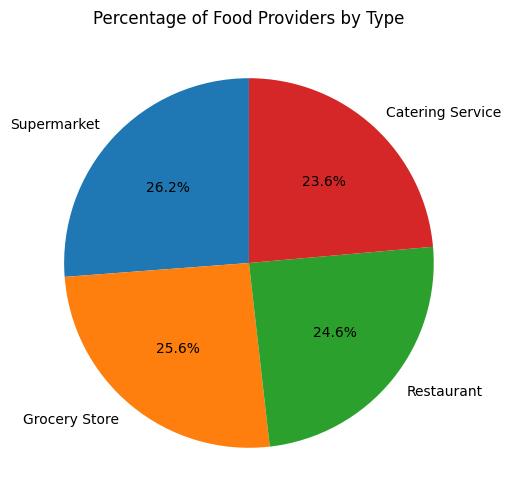

In [ ]:
# visualize
plt.figure(figsize=(6, 6))
plt.pie(result_2['Number_of_Providers'], labels=result_2['Type'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Food Providers by Type')
plt.show()

In [ ]:
# Q3 What is the contact information of food providers in a specific city?
query_3 = """
SELECT
    Name,
    Contact,
    City
FROM provider_data
WHERE City = 'West Christopher'; -- Replace 'West Christopher' with the desired city
"""
# show result
result_3 = pd.read_sql(query_3, conn)
result_3

Name             Contact              City
0              Butler-Anderson        593.024.1356  West Christopher
1  Martinez, Davis and Simmons  (024)268-9864x8442  West Christopher

In [ ]:
# Q4 Which receivers have claimed the most food?
query_4 = """
SELECT Name, COUNT(*) AS Number_of_Claims
FROM receivers_data
JOIN claims_data ON receivers_data.Receiver_ID = claims_data.Receiver_ID
GROUP BY Name
ORDER BY Number_of_Claims DESC;
"""
result_4 = pd.read_sql(query_4, conn)
result_4

Name  Number_of_Claims
0    William Frederick                 5
1         Scott Hunter                 5
2         Matthew Webb                 5
3       Anthony Garcia                 5
4      Kristine Martin                 4
..                 ...               ...
615          Alex Leon                 1
616      Alan Campbell                 1
617      Adam Browning                 1
618        Aaron Scott                 1
619       Aaron Keller                 1

[620 rows x 2 columns]

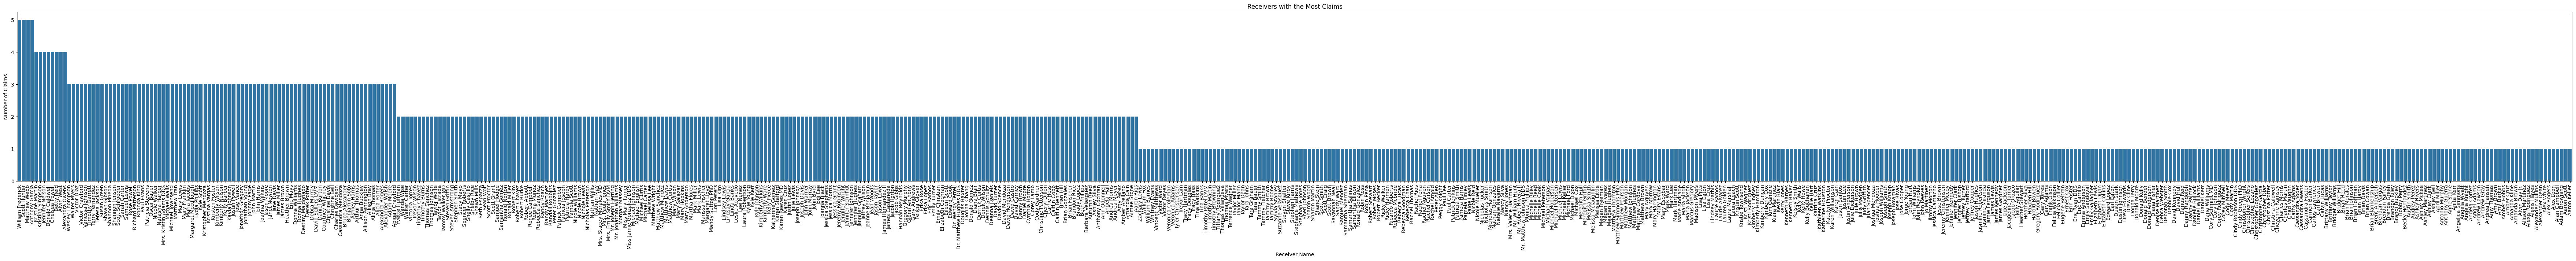

In [ ]:
# visualze qery 4
plt.figure(figsize=(90, 6))
sns.barplot(x='Name', y='Number_of_Claims', data=result_4)
plt.title('Receivers with the Most Claims')
plt.xlabel('Receiver Name')
plt.ylabel('Number of Claims')
plt.xticks(rotation=90)
plt.show()

In [55]:
# Receivers with highest quantity claimed status = completed
extra_query2 = """
SELECT Name, COUNT(*) AS Number_of_Claims
FROM receivers_data
JOIN claims_data ON receivers_data.Receiver_ID = claims_data.Receiver_ID
WHERE Status = 'Completed'
GROUP BY Name
ORDER BY Number_of_Claims DESC;
"""
extra_result2 = pd.read_sql(extra_query2, conn)
extra_result2

Name  Number_of_Claims
0     Timothy Garrett                 3
1        James Miller                 3
2        Derek Potter                 3
3     Alexandra Owens                 3
4     Vanessa Johnson                 2
..                ...               ...
287        Alex White                 1
288       Aimee Stone                 1
289  Abigail Crawford                 1
290       Aaron Scott                 1
291        Aaron Rios                 1

[292 rows x 2 columns]

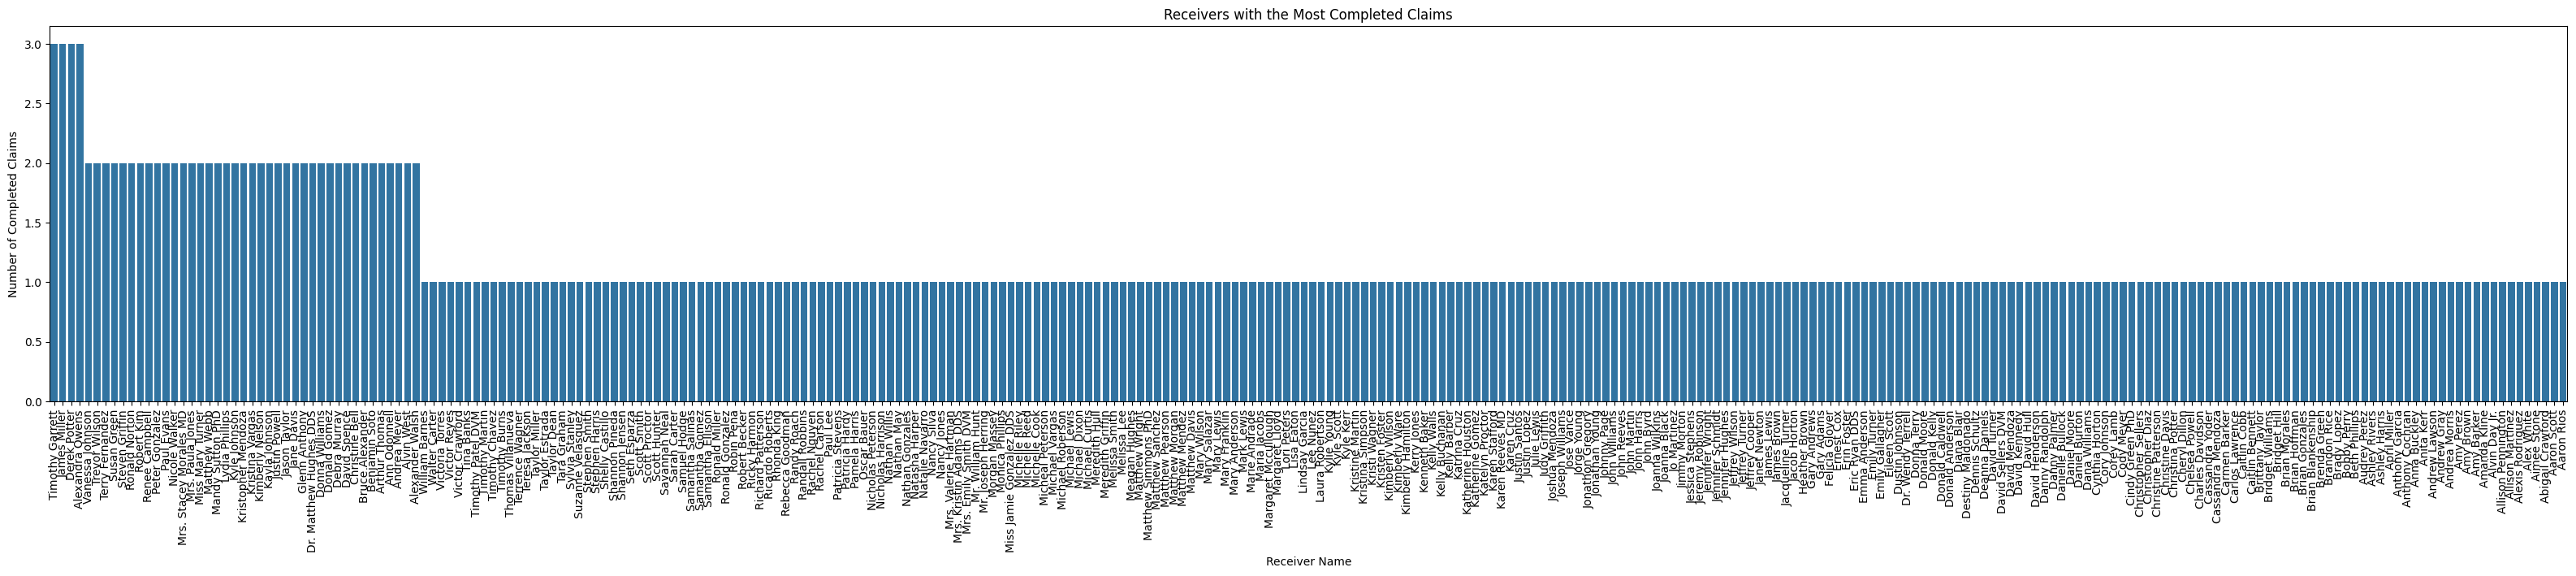

In [57]:
# visualize
plt.figure(figsize=(40, 6))
sns.barplot(x='Name', y='Number_of_Claims', data=extra_result2)
plt.title('Receivers with the Most Completed Claims')
plt.xlabel('Receiver Name')
plt.ylabel('Number of Completed Claims')
plt.xticks(rotation=90)
plt.show()

### insights:- these name the most active receivers in terms of completed claims.

In [ ]:
# Q5 What is the total quantity of food available from all providers?
query_5 = """
SELECT SUM(Quantity) AS Total_Quantity
FROM food_listings_data;
"""
result_5 = pd.read_sql(query_5, conn)
result_5

Total_Quantity
0           25794

### Insight: Represents the total donated quantity currently listed in the system.

In [ ]:
# Q6 Which location has the highest number of food listings?
query_6 = """
SELECT Location, COUNT(*) AS Number_of_Listings
FROM food_listings_data
GROUP BY Location
ORDER BY Number_of_Listings DESC
LIMIT 1;
"""
result_6 = pd.read_sql(query_6, conn)
result_6

Location  Number_of_Listings
0  South Kathryn                   6

In [ ]:
# which city has the highest number of food listings ?
query_Extra = """
SELECT City, COUNT(*) AS Number_of_Listings
FROM provider_data
GROUP BY City
ORDER BY Number_of_Listings DESC
LIMIT 20;
"""
result_Extra = pd.read_sql(query_Extra, conn)
result_Extra

City  Number_of_Listings
0   South Christopherborough                   3
1                  New Carol                   3
2                Williamview                   2
3          West Lauraborough                   2
4           West Christopher                   2
5                  Tammyside                   2
6               South Thomas                   2
7               Port Patrick                   2
8               Port Melissa                   2
9               Phillipsfort                   2
10            North Michelle                   2
11          North Kevinhaven                   2
12          North Julieburgh                   2
13              North Ashley                   2
14               New Zachary                   2
15               New Richard                   2
16                  New Lisa                   2
17                 New Larry                   2
18                  New John                   2
19                New Daniel                   2

###  insights:- Cities with more listings are key hubs for food distribution.

In [ ]:
# Q7 What are the most commonly available food types?
query_7 = """
SELECT Food_type, COUNT(*) AS Number_of_Listings
FROM food_listings_data
GROUP BY Food_type
ORDER BY Number_of_Listings DESC;
"""
result_7 = pd.read_sql(query_7, conn)
result_7

Food_type  Number_of_Listings
0                Vegan                 500
1  Vegan or Vegetarian                 202
2       Non-Vegetarian                 195
3           Vegetarian                 103

### Insight: Indicates dominant dietary categories in donations.

In [ ]:
# Q8 How many food claims have been made for each food item?
query_8 = """
SELECT
    T1.Food_ID,
    T2.Food_Name,
    COUNT(T1.Claim_ID) AS Number_of_Claims
FROM claims_data AS T1
JOIN food_listings_data AS T2 ON T1.Food_ID = T2.Food_ID
GROUP BY T1.Food_ID, T2.Food_Name
ORDER BY Number_of_Claims DESC;
"""
result_8 = pd.read_sql(query_8, conn)
result_8

Food_ID Food_Name  Number_of_Claims
0        463      Soup                 5
1        486   Chicken                 5
2        548      Fish                 5
3         35      Rice                 4
4         92   Chicken                 4
..       ...       ...               ...
642      990     Pasta                 1
643      992     Salad                 1
644      995      Rice                 1
645      998    Fruits                 1
646      999     Pasta                 1

[647 rows x 3 columns]

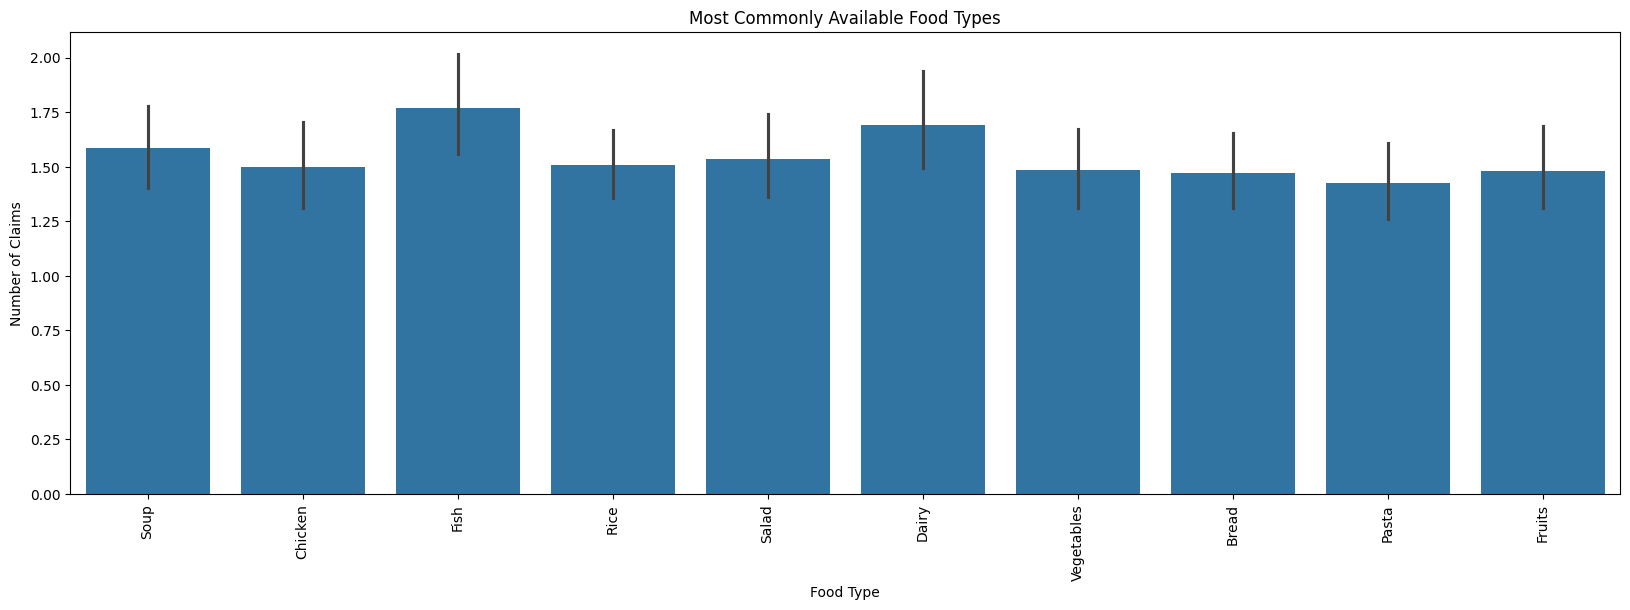

In [ ]:
#visualze query 8
plt.figure(figsize=(20, 6))
sns.barplot(x='Food_Name', y='Number_of_Claims', data=result_8)
plt.title('Most Commonly Available Food Types')
plt.xlabel('Food Type')
plt.ylabel('Number of Claims')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Q9 Which provider has had the highest number of successful food claims?
query_9 = """
SELECT T2.Name, COUNT(T1.Claim_ID) AS Number_of_Claims
FROM claims_data AS T1
JOIN food_listings_data AS T3 ON T1.Food_ID = T3.Food_ID
JOIN provider_data AS T2 ON T3.Provider_ID = T2.Provider_ID
WHERE T1.Status = 'Completed'
GROUP BY T2.Name
ORDER BY Number_of_Claims DESC
LIMIT 20;
"""

result_9 = pd.read_sql(query_9, conn)
result_9

Name  Number_of_Claims
0                    Barry Group                 5
1                     Miller Inc                 4
2    Harper, Blake and Alexander                 4
3              Butler-Richardson                 4
4      Barnes, Castro and Curtis                 4
5                  Rogers-Warren                 3
6                     Nelson LLC                 3
7                  Moore-Flowers                 3
8                   Mckinney Ltd                 3
9                Hancock-Jackson                 3
10                Davis and Sons                 3
11                  Campbell LLC                 3
12             Bradford-Martinez                 3
13                      Beck Inc                 3
14  Young, Townsend and Mccarthy                 2
15                    Wright LLC                 2
16                  Wilson-Brown                 2
17   White, Crawford and Pearson                 2
18                  Taylor Group                 2
19                    Steele Ltd                 2

In [ ]:
# Q10 What percentage of food claims are completed vs. pending vs. canceled?
query_10 = """
SELECT
    Status,
    COUNT(*) AS Number_of_Claims,
    (COUNT(*) * 100.0 / (SELECT COUNT(*) FROM claims_data)) AS Percentage
FROM claims_data
GROUP BY Status;
"""
result_10 = pd.read_sql(query_10, conn)
result_10

Status  Number_of_Claims  Percentage
0  Cancelled               336        33.6
1  Completed               339        33.9
2    Pending               325        32.5

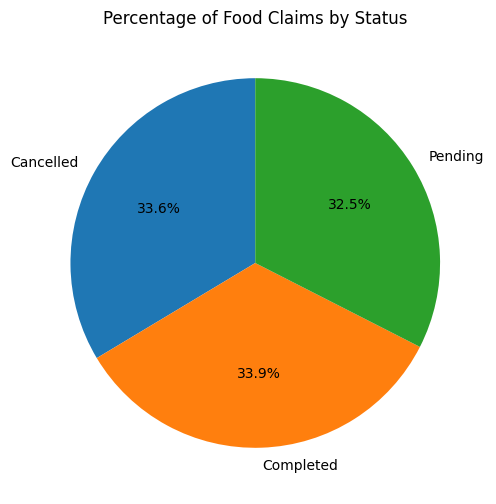

In [ ]:
# pie chart
plt.figure(figsize=(6, 6))
plt.pie(result_10['Number_of_Claims'], labels=result_10['Status'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Food Claims by Status')
plt.show()

In [ ]:
# Q11 What is the average quantity of food claimed per receiver?
query_11 = """
SELECT
    T2.Name AS Receiver_Name,
    AVG(T3.Quantity) AS Average_Quantity
FROM claims_data AS T1
JOIN receivers_data AS T2 ON T1.Receiver_ID = T2.Receiver_ID
JOIN food_listings_data AS T3 ON T1.Food_ID = T3.Food_ID
GROUP BY T2.Name
ORDER BY Average_Quantity DESC;
"""
result_11 = pd.read_sql(query_11, conn)
result_11

Receiver_Name  Average_Quantity
0    Thomas Villanueva              50.0
1         Peggy Knight              50.0
2          Nancy Silva              50.0
3          Nancy Jones              50.0
4           Lisa Pitts              50.0
..                 ...               ...
615     Kenneth Barnes               2.0
616      John Reynolds               2.0
617    Corey Rodriguez               2.0
618      Joshua Hooper               1.0
619       Amanda Kline               1.0

[620 rows x 2 columns]

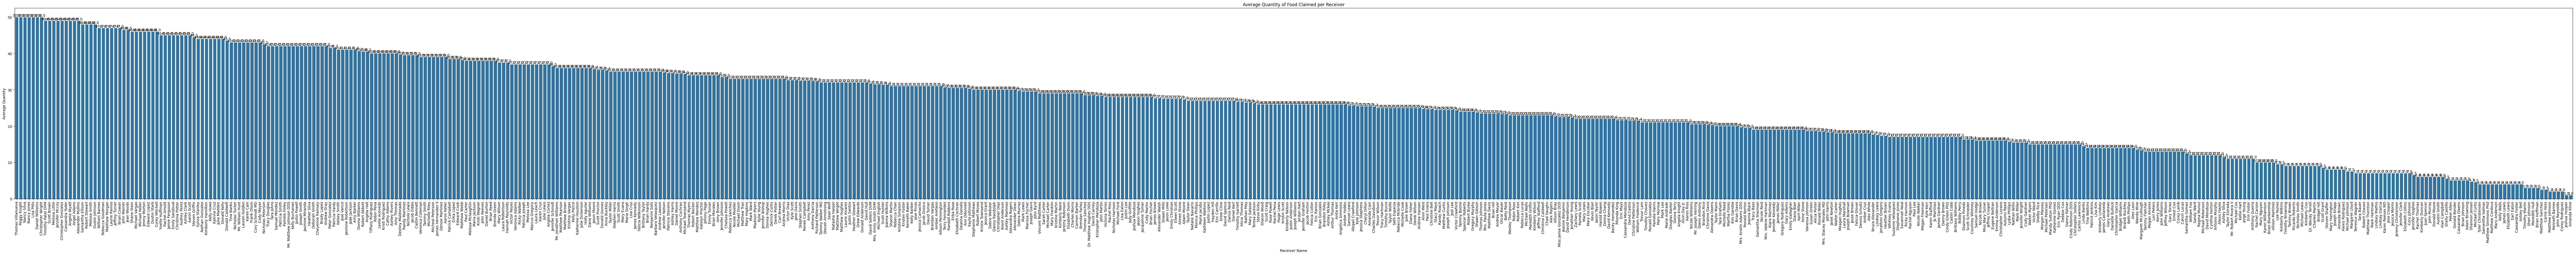

In [ ]:
# visualize
plt.figure(figsize=(100,10))
sns.barplot(x='Receiver_Name', y='Average_Quantity', data=result_11)
plt.title('Average Quantity of Food Claimed per Receiver')
plt.xlabel('Receiver Name')
plt.ylabel('Average Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
#label
for index, row in result_11.iterrows():
    plt.text(index, row['Average_Quantity'], str(round(row['Average_Quantity'], 1)), ha='center', va='bottom')
plt.show()

In [ ]:
# Q12 Which meal type (breakfast, lunch, dinner, snacks) is claimed the most?
query_12 = """
SELECT Meal_Type, COUNT(*) AS Number_of_Claims
FROM food_listings_data
JOIN claims_data ON food_listings_data.Food_ID = claims_data.Food_ID
GROUP BY Meal_Type
ORDER BY Number_of_Claims DESC;
"""
result_12 = pd.read_sql(query_12, conn)
result_12

Meal_Type  Number_of_Claims
0  Breakfast               278
1      Lunch               250
2     Snacks               240
3     Dinner               232

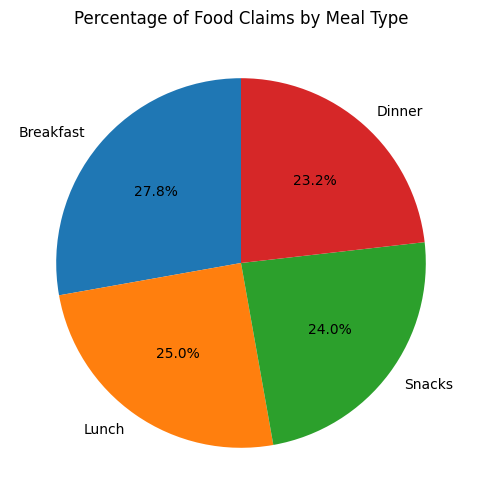

In [ ]:
# visualize qury 12
plt.figure(figsize=(6, 6))
plt.pie(result_12['Number_of_Claims'], labels=result_12['Meal_Type'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Food Claims by Meal Type')
plt.show()

In [ ]:
# Q13 What is the total quantity of food donated by each provider?
query_13 = """
SELECT T1.Name, SUM(T2.Quantity) AS Total_Quantity
FROM provider_data AS T1
JOIN food_listings_data AS T2 ON T1.Provider_ID = T2.Provider_ID
GROUP BY T1.Name ORDER BY Total_Quantity DESC;
"""
result_13 = pd.read_sql(query_13, conn)
result_13

Name  Total_Quantity
0                         Miller Inc             217
1                        Barry Group             179
2         Evans, Wright and Mitchell             158
3                        Smith Group             150
4                       Campbell LLC             145
..                               ...             ...
623                   Reyes and Sons               1
624                  Norris-Townsend               1
625                        Mcgee PLC               1
626  Martinez, Armstrong and Carroll               1
627                   Gonzales-Moore               1

[628 rows x 2 columns]

In [ ]:
QUERY_14 =  """
SELECT City,
       COUNT(DISTINCT Provider_ID) AS Number_of_Providers,
       0 AS Number_of_Receivers
FROM provider_data
GROUP BY City
UNION
SELECT City,
       0 AS Number_of_Providers,
       COUNT(DISTINCT Receiver_ID) AS Number_of_Receivers
FROM receivers_data
GROUP BY City;
"""

# result
result_14 = pd.read_sql(QUERY_14, conn)
result_14

City  Number_of_Providers  Number_of_Receivers
0         Aaronshire                    0                    1
1           Adambury                    1                    0
2           Adamland                    0                    1
3          Adamsview                    1                    0
4         Adamsville                    1                    0
...              ...                  ...                  ...
1924       Yatesside                    1                    0
1925    Youngchester                    1                    0
1926     Zacharyview                    0                    1
1927    Zimmermanton                    1                    0
1928  Zimmermanville                    1                    0

[1929 rows x 3 columns]

In [ ]:
# Q15 Examine how the number of food listings and claims changes over time.
query_15 = """
SELECT
    strftime('%Y-%m-%d', Timestamp) AS Date,
    COUNT(Claim_ID) AS Number_of_Claims,
    0 AS Number_of_Listings
FROM claims_data
GROUP BY Date

UNION ALL

SELECT
    strftime('%Y-%m-%d', Expiry_Date) AS Date,
    0 AS Number_of_Claims,
    COUNT(Food_ID) AS Number_of_Listings
FROM food_listings_data
GROUP BY Date
ORDER BY Date;
"""

# show result
result_15 = pd.read_sql(query_15, conn)
display(result_15)

Date  Number_of_Claims  Number_of_Listings
0   2025-03-01                40                   0
1   2025-03-02                47                   0
2   2025-03-03                46                   0
3   2025-03-04                44                   0
4   2025-03-05                47                   0
5   2025-03-06                37                   0
6   2025-03-07                53                   0
7   2025-03-08                56                   0
8   2025-03-09                40                   0
9   2025-03-10                60                   0
10  2025-03-11                44                   0
11  2025-03-12                52                   0
12  2025-03-13                62                   0
13  2025-03-14                51                   0
14  2025-03-15                51                   0
15  2025-03-16                45                   0
16  2025-03-16                 0                  61
17  2025-03-17                54                   0
18  2025-03-17                 0                  71
19  2025-03-18                57                   0
20  2025-03-18                 0                  66
21  2025-03-19                50                   0
22  2025-03-19                 0                  68
23  2025-03-20                45                   0
24  2025-03-20                 0                  73
25  2025-03-21                19                   0
26  2025-03-21                 0                  54
27  2025-03-22                 0                  76
28  2025-03-23                 0                  65
29  2025-03-24                 0                  76
30  2025-03-25                 0                  60
31  2025-03-26                 0                  55
32  2025-03-27                 0                  70
33  2025-03-28                 0                  66
34  2025-03-29                 0                  69
35  2025-03-30                 0                  70

In [ ]:
# Items past expiry
query_16 = """
SELECT Food_ID, Food_Name, Quantity, Expiry_Date, Location
FROM food_listings_data
WHERE DATE(Expiry_Date) < DATE('now')
ORDER BY Expiry_Date ASC
LIMIT 10;
"""

# show result
result_16 = pd.read_sql(query_16, conn)
display(result_16)

Food_ID Food_Name  Quantity          Expiry_Date            Location
0        4    Fruits        15  2025-03-16 00:00:00           Kellytown
1       30      Soup         4  2025-03-16 00:00:00           Clarkberg
2       42      Rice        50  2025-03-16 00:00:00      North Michelle
3       48      Rice        30  2025-03-16 00:00:00     North Jamesberg
4       53    Fruits        13  2025-03-16 00:00:00     North Carolfurt
5       69     Bread        47  2025-03-16 00:00:00       Gaineschester
6       70      Rice         7  2025-03-16 00:00:00        Boylechester
7       76     Pasta        40  2025-03-16 00:00:00  North Kennethshire
8       85     Pasta        28  2025-03-16 00:00:00          Brandyberg
9       94      Rice        35  2025-03-16 00:00:00          Linchester

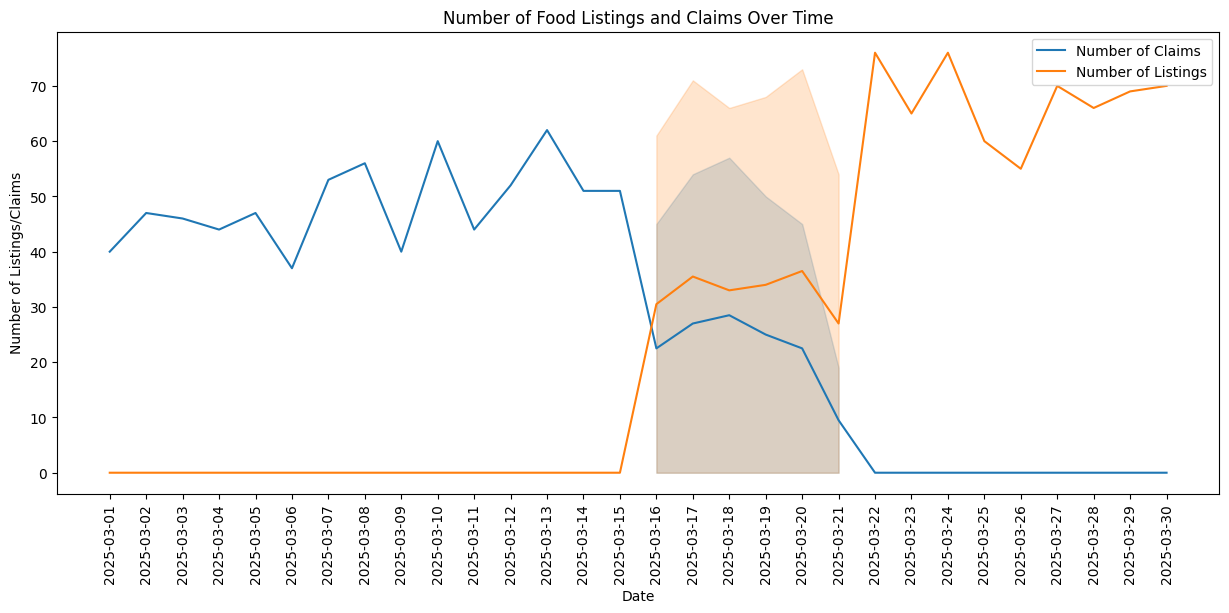

In [ ]:
# linechart
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Number_of_Claims', data=result_15, label='Number of Claims')
sns.lineplot(x='Date', y='Number_of_Listings', data=result_15, label='Number of Listings')
plt.title('Number of Food Listings and Claims Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Listings/Claims')
plt.legend()
plt.xticks(rotation=90)
plt.show()

- Claims occur earlier than listings: We can observe that claims start from the beginning of the data period (March 1st, 2025), while listings start later in the month (March 16th, 2025). This suggests that claims are being made for food items that were listed before the period covered by the food_listings_data in this dataset, or that the Expiry_Date is not the only factor driving claims.

- Claims and listings seem to have different temporal patterns: The number of claims fluctuates daily in the first half of March, while the number of listings starts from mid-March and also shows daily variations. It's difficult to see a direct correlation between daily claims and daily listings from this table alone, especially since the listings are based on expiry dates, not necessarily the date they were listed.

In [ ]:
# Analyze the status of claims over time
query_claims_status_time = """
SELECT
    strftime('%Y-%m-%d', Timestamp) AS Date,
    Status,
    COUNT(Claim_ID) AS Number_of_Claims
FROM claims_data
GROUP BY Date, Status
ORDER BY Date, Status;
"""

# show result
claims_status_time_result = pd.read_sql(query_claims_status_time, conn)
display(claims_status_time_result)

Date     Status  Number_of_Claims
0   2025-03-01  Cancelled                13
1   2025-03-01  Completed                13
2   2025-03-01    Pending                14
3   2025-03-02  Cancelled                24
4   2025-03-02  Completed                10
..         ...        ...               ...
58  2025-03-20  Completed                17
59  2025-03-20    Pending                14
60  2025-03-21  Cancelled                 5
61  2025-03-21  Completed                 4
62  2025-03-21    Pending                10

[63 rows x 3 columns]

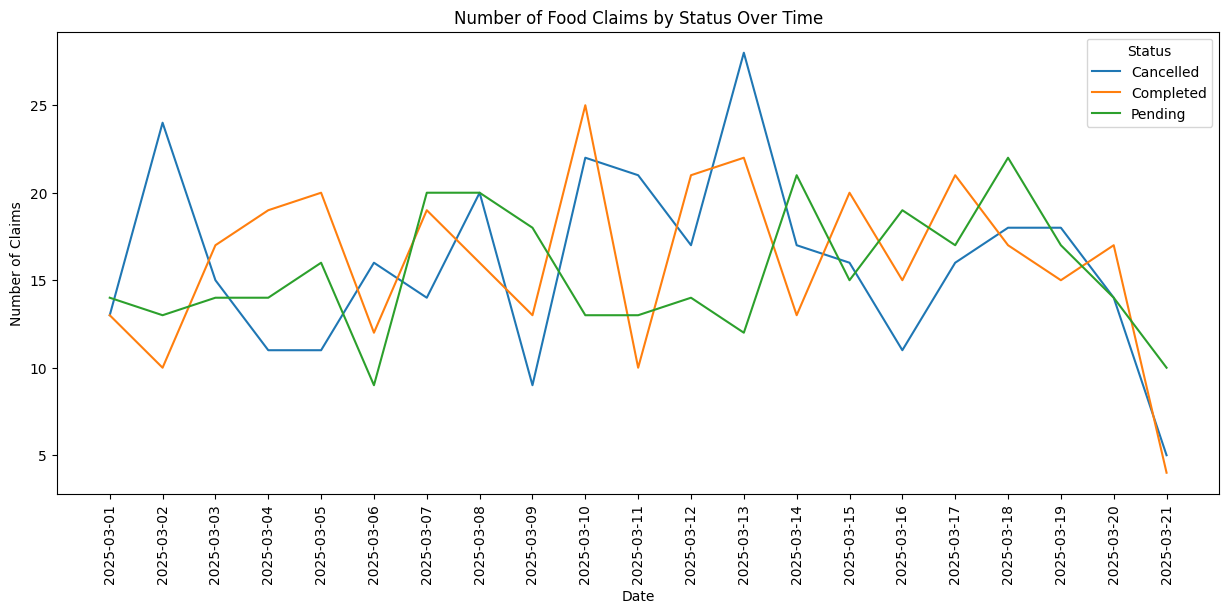

In [ ]:
# visualize
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Number_of_Claims', hue='Status', data=claims_status_time_result)
plt.title('Number of Food Claims by Status Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Claims')
plt.legend(title='Status')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Analyze listings by provider type over time
query_listings_provider_time = """
SELECT
    strftime('%Y-%m-%d', Expiry_Date) AS Date,
    Provider_Type,
    COUNT(Food_ID) AS Number_of_Listings
FROM food_listings_data
GROUP BY Date, Provider_Type
ORDER BY Date, Provider_Type;
"""

# show result
listings_provider_time_result = pd.read_sql(query_listings_provider_time, conn)
display(listings_provider_time_result)

Date     Provider_Type  Number_of_Listings
0   2025-03-16  Catering Service                  12
1   2025-03-16     Grocery Store                  12
2   2025-03-16        Restaurant                  16
3   2025-03-16       Supermarket                  21
4   2025-03-17  Catering Service                  16
5   2025-03-17     Grocery Store                  18
6   2025-03-17        Restaurant                  17
7   2025-03-17       Supermarket                  20
8   2025-03-18  Catering Service                  18
9   2025-03-18     Grocery Store                  14
10  2025-03-18        Restaurant                  19
11  2025-03-18       Supermarket                  15
12  2025-03-19  Catering Service                  14
13  2025-03-19     Grocery Store                  14
14  2025-03-19        Restaurant                  25
15  2025-03-19       Supermarket                  15
16  2025-03-20  Catering Service                  19
17  2025-03-20     Grocery Store                  18
18  2025-03-20        Restaurant                  20
19  2025-03-20       Supermarket                  16
20  2025-03-21  Catering Service                  10
21  2025-03-21     Grocery Store                  10
22  2025-03-21        Restaurant                  17
23  2025-03-21       Supermarket                  17
24  2025-03-22  Catering Service                  20
25  2025-03-22     Grocery Store                  15
26  2025-03-22        Restaurant                  23
27  2025-03-22       Supermarket                  18
28  2025-03-23  Catering Service                  11
29  2025-03-23     Grocery Store                  17
30  2025-03-23        Restaurant                  14
31  2025-03-23       Supermarket                  23
32  2025-03-24  Catering Service                  16
33  2025-03-24     Grocery Store                  25
34  2025-03-24        Restaurant                  18
35  2025-03-24       Supermarket                  17
36  2025-03-25  Catering Service                  19
37  2025-03-25     Grocery Store                  16
38  2025-03-25        Restaurant                  13
39  2025-03-25       Supermarket                  12
40  2025-03-26  Catering Service                   9
41  2025-03-26     Grocery Store                  18
42  2025-03-26        Restaurant                  12
43  2025-03-26       Supermarket                  16
44  2025-03-27  Catering Service                  18
45  2025-03-27     Grocery Store                  16
46  2025-03-27        Restaurant                  21
47  2025-03-27       Supermarket                  15
48  2025-03-28  Catering Service                  22
49  2025-03-28     Grocery Store                  15
50  2025-03-28        Restaurant                  18
51  2025-03-28       Supermarket                  11
52  2025-03-29  Catering Service                  16
53  2025-03-29     Grocery Store                  18
54  2025-03-29        Restaurant                  15
55  2025-03-29       Supermarket                  20
56  2025-03-30  Catering Service                  12
57  2025-03-30     Grocery Store                  17
58  2025-03-30        Restaurant                  10
59  2025-03-30       Supermarket                  31

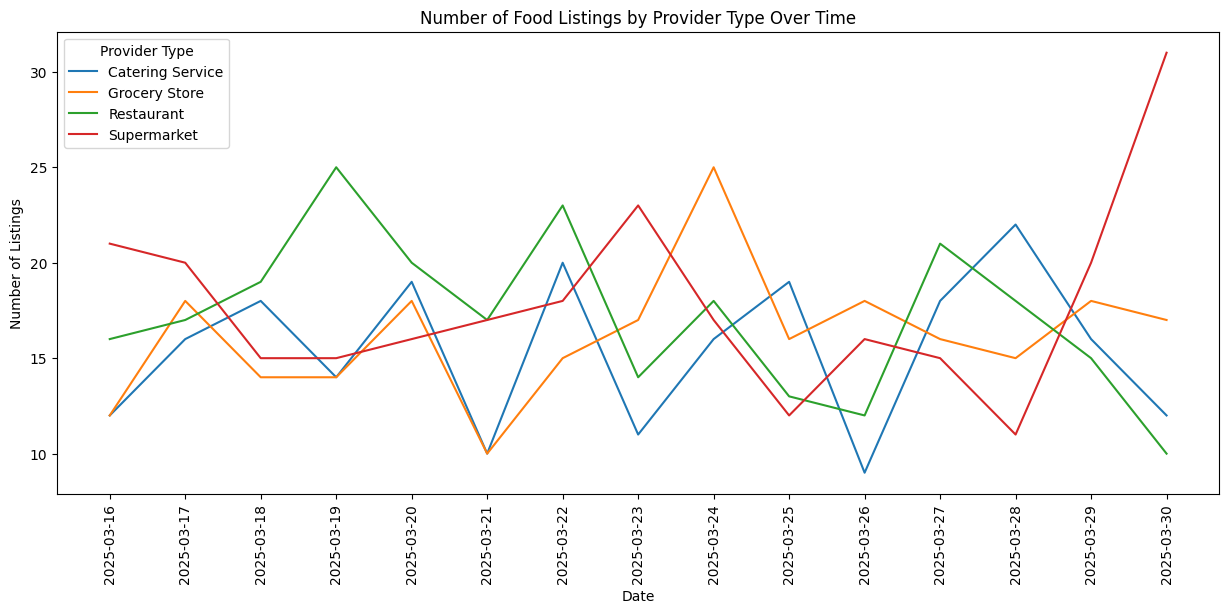

In [ ]:
# visualize
plt.figure(figsize=(15, 6))
sns.lineplot(x='Date', y='Number_of_Listings', hue='Provider_Type', data=listings_provider_time_result)
plt.title('Number of Food Listings by Provider Type Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.legend(title='Provider Type')
plt.xticks(rotation=90)
plt.show()

- Listings start from March 16th: As we observed before, the listings in this dataset start from March 16th, 2025, based on the Expiry_Date.

- Variations in listings by provider type: The number of listings varies daily for each provider type (Catering Service, Grocery Store, Restaurant, Supermarket).

- Supermarkets and Restaurants seem to have higher listing counts on some days: While all provider types contribute listings, Supermarkets and Restaurants appear to have higher numbers of listings on certain days compared to Catering Services and Grocery Stores.

- Fluctuations across all types: There isn't a clear consistent trend for any specific provider type; the number of listings fluctuates throughout the period for all of them.

In [ ]:
# Total donated quantity by provider with higest 20
query_18 = """
SELECT T1.Name, SUM(T2.Quantity) AS Total_Quantity
FROM provider_data AS T1
JOIN food_listings_data AS T2 ON T1.Provider_ID = T2.Provider_ID
GROUP BY T1.Name ORDER BY Total_Quantity DESC LIMIT 20;
"""
result_18 = pd.read_sql(query_18, conn)
result_18

Name  Total_Quantity
0                   Miller Inc             217
1                  Barry Group             179
2   Evans, Wright and Mitchell             158
3                  Smith Group             150
4                 Campbell LLC             145
5                   Nelson LLC             142
6                   Ruiz-Oneal             140
7            Blankenship-Lewis             124
8                   Kelly-Ware             123
9            Bradford-Martinez             121
10           Shepherd and Sons             116
11                 Hampton-Lee             116
12     Jones, Ortega and Rubio             115
13                   Ortiz-Lee             114
14                 Johnson-Ray             113
15                  Barker LLC             110
16                 Moore Group             106
17     Hill, Davis and Stewart             106
18                  Steele Ltd             104
19           Butler-Richardson             104

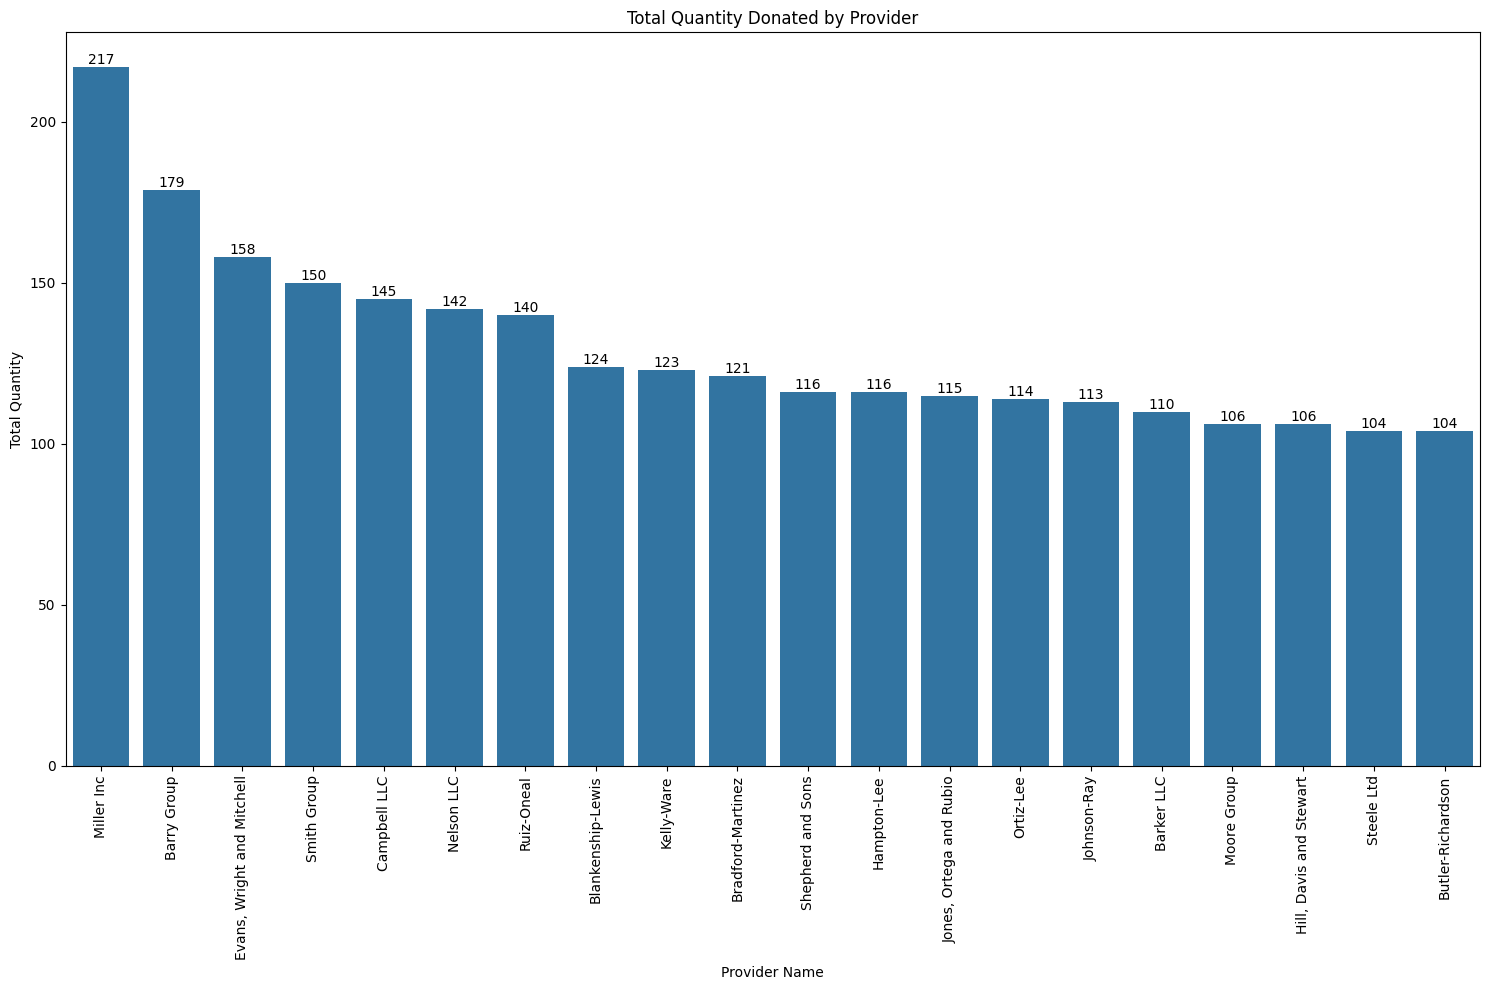

In [ ]:
# visualize
plt.figure(figsize=(15,10))
sns.barplot(x='Name', y='Total_Quantity', data=result_18)
plt.title('Total Quantity Donated by Provider')
plt.xlabel('Provider Name')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
#label
for index, row in result_18.iterrows():
    plt.text(index, row['Total_Quantity'], str(round(row['Total_Quantity'], 1)), ha='center', va='bottom')
plt.show()

In [ ]:
# Q19 Receivers with highest quantity claimed
query_19 = """
SELECT
    T2.Name AS Receiver_Name,
    SUM(T3.Quantity) AS Total_Quantity
FROM claims_data AS T1
JOIN receivers_data AS T2 ON T1.Receiver_ID = T2.Receiver_ID
JOIN food_listings_data AS T3 ON T1.Food_ID = T3.Food_ID
GROUP BY T2.Name
ORDER BY Total_Quantity DESC
LIMIT 20;
"""
result_19 = pd.read_sql(query_19, conn)
result_19

Receiver_Name  Total_Quantity
0        Matthew Webb             191
1     Donald Caldwell             174
2      Anthony Garcia             162
3        Scott Hunter             157
4     Jennifer Nelson             139
5      Chelsea Powell             134
6       Justin Powell             126
7    Kristina Simpson             124
8          Jose Vance             123
9      Donna Williams             122
10  Destiny Maldonado             119
11    Kristine Martin             116
12      Daniel Burton             114
13    Kristina Vargas             108
14  William Frederick             107
15        Jason Moore             107
16       Anna Buckley             106
17      Benjamin Soto             105
18   Patricia Stevens             104
19      Ashley Harris             104

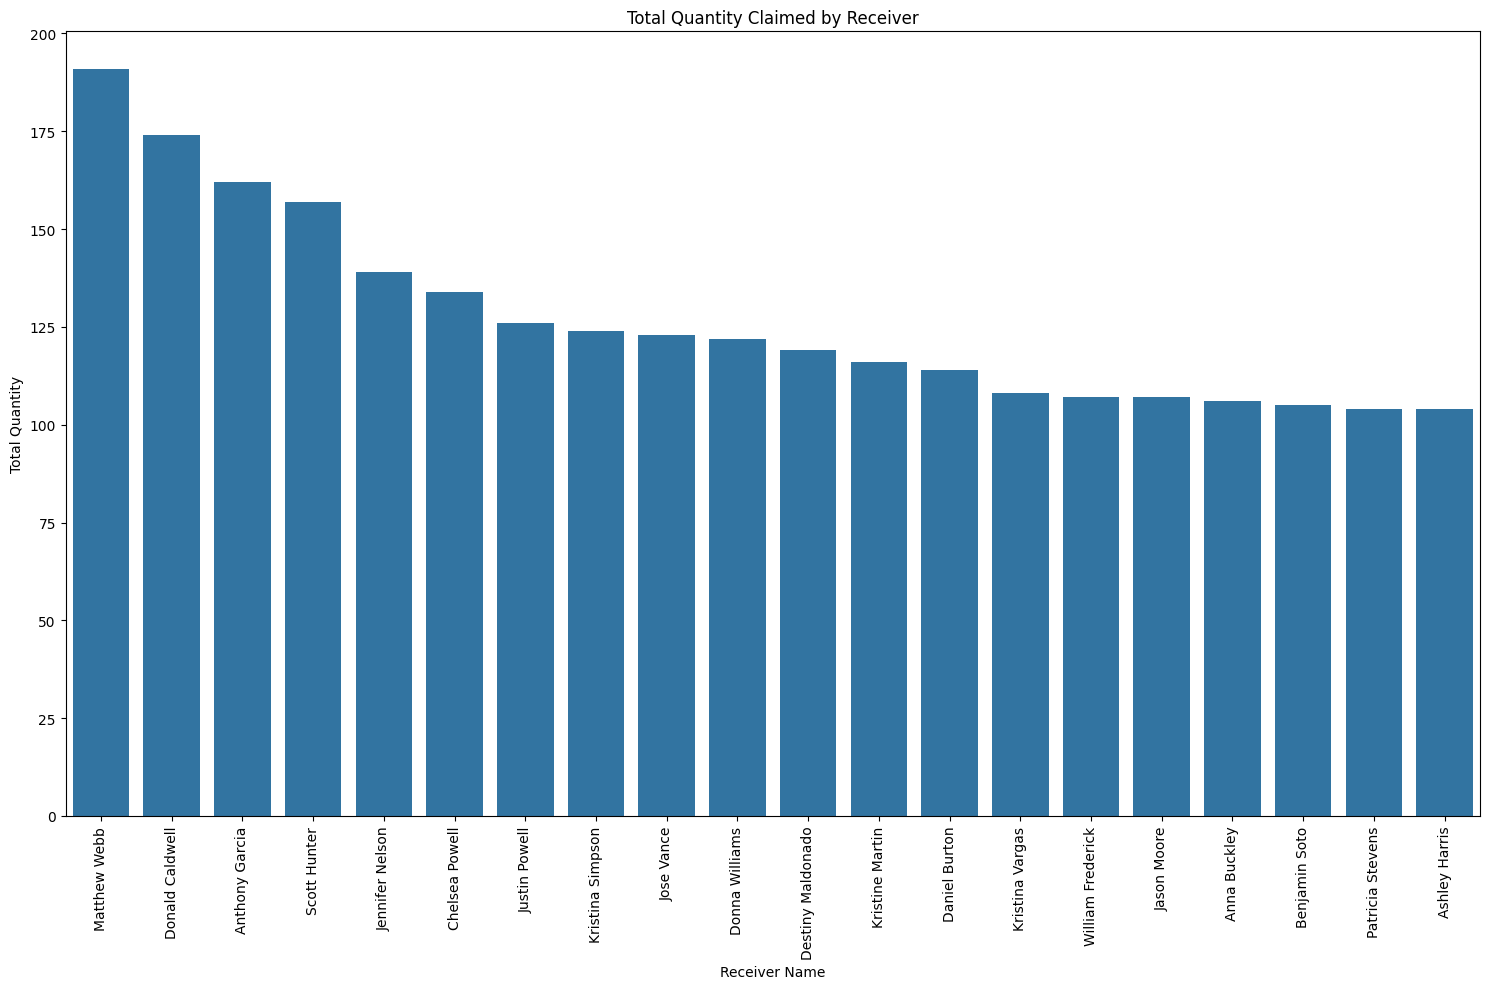

In [54]:
# visualize
plt.figure(figsize=(15,10))
sns.barplot(x='Receiver_Name', y='Total_Quantity', data=result_19)
plt.title('Total Quantity Claimed by Receiver')
plt.xlabel('Receiver Name')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [74]:
%%writefile foodwaste_management_app2.py

import streamlit as st
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Connect to the database
conn = sql.connect('database.db')

st.title('Food Waste Management Dashboard')

# --- Dataset Information ---
st.header('Dataset Information')

# Get and display the total number of records for each table
provider_count = pd.read_sql("SELECT COUNT(*) FROM provider_data", conn).iloc[0, 0]
receivers_count = pd.read_sql("SELECT COUNT(*) FROM receivers_data", conn).iloc[0, 0]
food_listings_count = pd.read_sql("SELECT COUNT(*) FROM food_listings_data", conn).iloc[0, 0]
claims_count = pd.read_sql("SELECT COUNT(*) FROM claims_data", conn).iloc[0, 0]

st.write(f"**Provider Data:** {provider_count} records available.")
st.write(f"**Receivers Data:** {receivers_count} records available.")
st.write(f"**Food Listings Data:** {food_listings_count} records available.")
st.write(f"**Claims Data:** {claims_count} records available.")


st.subheader('Provider Data Schema')
st.write(pd.read_sql("SELECT sql FROM sqlite_master WHERE name='provider_data'", conn).iloc[0, 0])
st.subheader('First 5 Rows of Provider Data')
st.dataframe(pd.read_sql("SELECT * FROM provider_data LIMIT 5", conn))


st.subheader('Receivers Data Schema')
st.write(pd.read_sql("SELECT sql FROM sqlite_master WHERE name='receivers_data'", conn).iloc[0, 0])
st.subheader('First 5 Rows of Receivers Data')
st.dataframe(pd.read_sql("SELECT * FROM receivers_data LIMIT 5", conn))


st.subheader('Food Listings Data Schema')
st.write(pd.read_sql("SELECT sql FROM sqlite_master WHERE name='food_listings_data'", conn).iloc[0, 0])
st.subheader('First 5 Rows of Food Listings Data')
st.dataframe(pd.read_sql("SELECT * FROM food_listings_data LIMIT 5", conn))


st.subheader('Claims Data Schema')
st.write(pd.read_sql("SELECT sql FROM sqlite_master WHERE name='claims_data'", conn).iloc[0, 0])
st.subheader('First 5 Rows of Claims Data')
st.dataframe(pd.read_sql("SELECT * FROM claims_data LIMIT 5", conn))



# --- Analysis and Visualizations ---
st.header('Analysis and Visualizations')

# Add filters to the sidebar
st.sidebar.header("Filter Options")

status_options = ['All'] + list(pd.read_sql("SELECT DISTINCT Status FROM claims_data", conn)['Status'])
selected_status = st.sidebar.selectbox('Select Claim Status:', status_options)

provider_type_options = ['All'] + list(pd.read_sql("SELECT DISTINCT Type FROM provider_data", conn)['Type'])
selected_provider_type = st.sidebar.selectbox('Select Provider Type:', provider_type_options)

receiver_type_options = ['All'] + list(pd.read_sql("SELECT DISTINCT Type FROM receivers_data", conn)['Type'])
selected_receiver_type = st.sidebar.selectbox('Select Receiver Type:', receiver_type_options)

food_type_options = ['All'] + list(pd.read_sql("SELECT DISTINCT Food_type FROM food_listings_data", conn)['Food_type'])
selected_food_type = st.sidebar.selectbox('Select Food Type:', food_type_options)

meal_type_options = ['All'] + list(pd.read_sql("SELECT DISTINCT Meal_Type FROM food_listings_data", conn)['Meal_Type'])
selected_meal_type = st.sidebar.selectbox('Select Meal Type:', meal_type_options)

location_options = ['All'] + list(pd.read_sql("SELECT DISTINCT Location FROM food_listings_data", conn)['Location'])
selected_location = st.sidebar.selectbox('Select Location:', location_options)


# --- Dynamic Metric Cards ---
st.subheader("Key Metrics")

# Query for number of providers with filters
query_provider_count_filtered = "SELECT COUNT(DISTINCT Provider_ID) FROM provider_data WHERE 1=1"
if selected_provider_type != 'All':
    query_provider_count_filtered += f" AND Type = '{selected_provider_type}'"
# Location filter is not directly applicable to provider count unless we join with food_listings_data
# For simplicity, I will not apply location filter here.

filtered_provider_count = pd.read_sql(query_provider_count_filtered, conn).iloc[0, 0]

# Query for number of receivers with filters
query_receiver_count_filtered = "SELECT COUNT(DISTINCT Receiver_ID) FROM receivers_data WHERE 1=1"
if selected_receiver_type != 'All':
    query_receiver_count_filtered += f" AND Type = '{selected_receiver_type}'"
# Location filter is not directly applicable to receiver count unless we join with claims_data and food_listings_data
# For simplicity, I will not apply location filter here.
filtered_receiver_count = pd.read_sql(query_receiver_count_filtered, conn).iloc[0, 0]


# Query for number of claims with filters
query_claims_count_filtered = """
SELECT COUNT(T1.Claim_ID)
FROM claims_data AS T1
JOIN food_listings_data AS T2 ON T1.Food_ID = T2.Food_ID
JOIN receivers_data AS T3 ON T1.Receiver_ID = T3.Receiver_ID
WHERE 1=1
"""
if selected_status != 'All':
    query_claims_count_filtered += f" AND T1.Status = '{selected_status}'"
if selected_receiver_type != 'All':
    query_claims_count_filtered += f" AND T3.Type = '{selected_receiver_type}'"
if selected_food_type != 'All':
    query_claims_count_filtered += f" AND T2.Food_type = '{selected_food_type}'"
if selected_meal_type != 'All':
    query_claims_count_filtered += f" AND T2.Meal_Type = '{selected_meal_type}'"
if selected_location != 'All':
    query_claims_count_filtered += f" AND T2.Location = '{selected_location}'"

filtered_claims_count = pd.read_sql(query_claims_count_filtered, conn).iloc[0, 0]
if filtered_claims_count is None:
    filtered_claims_count = 0

# Query for total quantity with filters
query_total_quantity_filtered = """
SELECT SUM(T1.Quantity)
FROM food_listings_data AS T1
JOIN provider_data AS T2 ON T1.Provider_ID = T2.Provider_ID
WHERE 1=1
"""
if selected_provider_type != 'All':
    query_total_quantity_filtered += f" AND T2.Type = '{selected_provider_type}'"
if selected_food_type != 'All':
    query_total_quantity_filtered += f" AND T1.Food_type = '{selected_food_type}'"
if selected_meal_type != 'All':
    query_total_quantity_filtered += f" AND T1.Meal_Type = '{selected_meal_type}'"
if selected_location != 'All':
    query_total_quantity_filtered += f" AND T1.Location = '{selected_location}'"


filtered_total_quantity = pd.read_sql(query_total_quantity_filtered, conn).iloc[0, 0]
if filtered_total_quantity is None:
    filtered_total_quantity = 0

# Display metrics in columns
col1, col2, col3, col4 = st.columns(4)

with col1:
    st.metric(label="Number of Providers", value=filtered_provider_count)

with col2:
    st.metric(label="Number of Receivers", value=filtered_receiver_count)

with col3:
    st.metric(label="Number of Claims", value=filtered_claims_count)

with col4:
    st.metric(label="Total Quantity (Units)", value=filtered_total_quantity)


# Create a selection box for the user to choose the analysis
analysis_option = st.selectbox(
    'Select an analysis to view:',
    (
        'Number of Food Providers and Receivers in Each City',
        'Percentage of Food Providers by Type',
        'Contact Information by City',
        'Receivers with the Most Claims',
        'Receivers with the Most Completed Claims',
        'Total Quantity of Food Available from All Providers',
        'Location with the Highest Number of Food Listings',
        'Cities with the Highest Number of Food Listings (Top 20)',
        'Most Commonly Available Food Types',
        'Number of Food Claims for Each Food Item',
        'Providers with the Highest Number of Successful Food Claims (Top 20)',
        'Percentage of Food Claims by Status',
        'Average Quantity of Food Claimed per Receiver',
        'Percentage of Food Claims by Meal Type',
        'Total Quantity of Food Donated by Each Provider',
        'Number of Food Listings and Claims Over Time',
        'Number of Food Claims by Status Over Time',
        'Number of Food Listings by Provider Type Over Time',
        'Total Quantity Donated by Provider (Top 20)',
        'Total Quantity Claimed by Receiver (Top 20)'
    )
)

# Display the selected analysis and visualization
if analysis_option == 'Number of Food Providers and Receivers in Each City':
    st.subheader('Q1: Number of Food Providers and Receivers in Each City')
    query_1 = """
    SELECT
        T1.City,
        COUNT(DISTINCT T1.Provider_ID) AS Number_of_Providers,
        COUNT(DISTINCT T2.Receiver_ID) AS Number_of_Receivers
    FROM provider_data AS T1
    LEFT JOIN receivers_data AS T2 ON T1.City = T2.City
    WHERE 1=1
    """
    if selected_provider_type != 'All':
        query_1 += f" AND T1.Type = '{selected_provider_type}'"
    if selected_receiver_type != 'All':
        query_1 += f" AND T2.Type = '{selected_receiver_type}'"
    # Location filter is not directly applicable at the city level unless we join

    query_1 += """
    GROUP BY T1.City;
    """
    result_1 = pd.read_sql(query_1, conn)
    st.dataframe(result_1)

    st.subheader('Top 20 Cities by Number of Food Providers and Receivers')
    result_1['Total_Count'] = result_1['Number_of_Providers'] + result_1['Number_of_Receivers']
    top_20_cities = result_1.sort_values(by='Total_Count', ascending=False).head(20)
    fig1, ax1 = plt.subplots(figsize=(12, 7))
    sns.barplot(x='City', y='Number_of_Providers', data=top_20_cities, ax=ax1)
    sns.barplot(x='City', y='Number_of_Receivers', data=top_20_cities, ax=ax1)
    plt.title('Top 20 Cities by Number of Food Providers and Receivers')
    plt.xlabel('City')
    plt.ylabel('Number of Providers/Receivers')
    plt.xticks(rotation=90)
    ax1.legend(['Providers', 'Receivers'])
    plt.tight_layout()
    st.pyplot(fig1)


elif analysis_option == 'Percentage of Food Providers by Type':
    st.subheader('Q2: Percentage of Food Providers by Type')
    query_2 = """
    SELECT
        Type,
        COUNT(*) AS Number_of_Providers
    FROM provider_data
    WHERE 1=1
    """
    if selected_provider_type != 'All':
        query_2 += f" AND Type = '{selected_provider_type}'"
    # Location filter is not directly applicable

    query_2 += """
    GROUP BY Type
    ORDER BY Number_of_Providers DESC;
    """
    result_2 = pd.read_sql(query_2, conn)
    st.dataframe(result_2)

    fig2, ax2 = plt.subplots(figsize=(6, 6))
    ax2.pie(result_2['Number_of_Providers'], labels=result_2['Type'], autopct='%1.1f%%', startangle=90)
    ax2.set_title('Percentage of Food Providers by Type')
    st.pyplot(fig2)

elif analysis_option == 'Contact Information by City':
    st.subheader('Contact Information by City')
    provider_city_query = "SELECT DISTINCT City FROM provider_data ORDER BY City;"
    provider_cities = pd.read_sql(provider_city_query, conn)['City'].tolist()
    selected_provider_city = st.selectbox('Select a city for Provider Contact Information:', provider_cities)

    st.subheader(f"Provider Contact Information in {selected_provider_city}:")
    query_provider_contact = f"""
    SELECT
        Name,
        Contact,
        Type
    FROM provider_data
    WHERE City = '{selected_provider_city}'
    """
    if selected_provider_type != 'All':
        query_provider_contact += f" AND Type = '{selected_provider_type}'"
    query_provider_contact += ";"
    result_provider_contact = pd.read_sql(query_provider_contact, conn)
    st.dataframe(result_provider_contact)

    receiver_city_query = "SELECT DISTINCT City FROM receivers_data ORDER BY City;"
    receiver_cities = pd.read_sql(receiver_city_query, conn)['City'].tolist()
    selected_receiver_city = st.selectbox('Select a city for Receiver Contact Information:', receiver_cities)

    st.subheader(f"Receiver Contact Information in {selected_receiver_city}:")
    query_receiver_contact = f"""
    SELECT
        Name,
        Contact,
        Type
    FROM receivers_data
    WHERE City = '{selected_receiver_city}'
    """
    if selected_receiver_type != 'All':
        query_receiver_contact += f" AND Type = '{selected_receiver_type}'"
    query_receiver_contact += ";"
    result_receiver_contact = pd.read_sql(query_receiver_contact, conn)
    st.dataframe(result_receiver_contact)


elif analysis_option == 'Receivers with the Most Claims':
    st.subheader('Q4: Receivers with the Most Claims')
    query_4 = """
    SELECT T1.Name, COUNT(*) AS Number_of_Claims
    FROM receivers_data AS T1
    JOIN claims_data AS T2 ON T1.Receiver_ID = T2.Receiver_ID
    JOIN food_listings_data AS T3 ON T2.Food_ID = T3.Food_ID
    WHERE 1=1
    """
    if selected_receiver_type != 'All':
        query_4 += f" AND T1.Type = '{selected_receiver_type}'"
    if selected_status != 'All':
        query_4 += f" AND T2.Status = '{selected_status}'"
    if selected_food_type != 'All':
        query_4 += f" AND T3.Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_4 += f" AND T3.Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_4 += f" AND T3.Location = '{selected_location}'"


    query_4 += """
    GROUP BY T1.Name
    ORDER BY Number_of_Claims DESC;
    """
    result_4 = pd.read_sql(query_4, conn)
    st.dataframe(result_4)

    st.subheader('Top 20 Receivers by Number of Claims')
    fig4, ax4 = plt.subplots(figsize=(12, 7))
    sns.barplot(x='Name', y='Number_of_Claims', data=result_4.head(20), ax=ax4)
    plt.title('Top 20 Receivers by Number of Claims')
    plt.xlabel('Receiver Name')
    plt.ylabel('Number of Claims')
    plt.xticks(rotation=90)
    plt.tight_layout()
    st.pyplot(fig4)

elif analysis_option == 'Receivers with the Most Completed Claims':
    st.subheader('Receivers with the Most Completed Claims')
    extra_query2 = """
    SELECT T1.Name, COUNT(*) AS Number_of_Claims
    FROM receivers_data AS T1
    JOIN claims_data AS T2 ON T1.Receiver_ID = T2.Receiver_ID
    JOIN food_listings_data AS T3 ON T2.Food_ID = T3.Food_ID
    WHERE T2.Status = 'Completed'
    """
    if selected_receiver_type != 'All':
        extra_query2 += f" AND T1.Type = '{selected_receiver_type}'"
    if selected_food_type != 'All':
        extra_query2 += f" AND T3.Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        extra_query2 += f" AND T3.Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        extra_query2 += f" AND T3.Location = '{selected_location}'"


    extra_query2 += """
    GROUP BY T1.Name
    ORDER BY Number_of_Claims DESC;
    """
    extra_result2 = pd.read_sql(extra_query2, conn)
    st.dataframe(extra_result2)

    st.subheader('Top 20 Receivers by Number of Completed Claims')
    fig_extra2, ax_extra2 = plt.subplots(figsize=(12, 7))
    sns.barplot(x='Name', y='Number_of_Claims', data=extra_result2.head(20), ax=ax_extra2)
    plt.title('Top 20 Receivers by Number of Completed Claims')
    plt.xlabel('Receiver Name')
    plt.ylabel('Number of Completed Claims')
    plt.xticks(rotation=90)
    plt.tight_layout()
    st.pyplot(fig_extra2)

elif analysis_option == 'Total Quantity of Food Available from All Providers':
    st.subheader('Q5: Total Quantity of Food Available from All Providers')
    query_5 = """
    SELECT SUM(Quantity) AS Total_Quantity
    FROM food_listings_data
    WHERE 1=1
    """
    if selected_provider_type != 'All':
        query_5 += f" AND Provider_Type = '{selected_provider_type}'"
    if selected_food_type != 'All':
        query_5 += f" AND Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_5 += f" AND Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_5 += f" AND Location = '{selected_location}'"

    query_5 += ";"
    result_5 = pd.read_sql(query_5, conn)
    st.dataframe(result_5)

elif analysis_option == 'Location with the Highest Number of Food Listings':
    st.subheader('Q6: Location with the Highest Number of Food Listings')
    query_6 = """
    SELECT Location, COUNT(*) AS Number_of_Listings
    FROM food_listings_data
    WHERE 1=1
    """
    if selected_provider_type != 'All':
        query_6 += f" AND Provider_Type = '{selected_provider_type}'"
    if selected_food_type != 'All':
        query_6 += f" AND Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_6 += f" AND Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_6 += f" AND Location = '{selected_location}'"
    query_6 += """
    GROUP BY Location
    ORDER BY Number_of_Listings DESC
    LIMIT 1;
    """
    result_6 = pd.read_sql(query_6, conn)
    st.dataframe(result_6)

elif analysis_option == 'Cities with the Highest Number of Food Listings (Top 20)':
    st.subheader('Cities with the Highest Number of Food Listings (Top 20)')
    query_Extra = """
    SELECT T1.City, COUNT(T2.Food_ID) AS Number_of_Listings
    FROM provider_data AS T1
    JOIN food_listings_data AS T2 ON T1.Provider_ID = T2.Provider_ID
    WHERE 1=1
    """
    if selected_provider_type != 'All':
        query_Extra += f" AND T1.Type = '{selected_provider_type}'"
    if selected_food_type != 'All':
        query_Extra += f" AND T2.Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_Extra += f" AND T2.Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_Extra += f" AND T2.Location = '{selected_location}'"

    query_Extra += """
    GROUP BY T1.City
    ORDER BY Number_of_Listings DESC
    LIMIT 20;
    """
    result_Extra = pd.read_sql(query_Extra, conn)
    st.dataframe(result_Extra)

elif analysis_option == 'Most Commonly Available Food Types':
    st.subheader('Q7: Most Commonly Available Food Types')
    query_7 = """
    SELECT Food_type, COUNT(*) AS Number_of_Listings
    FROM food_listings_data
    WHERE 1=1
    """
    if selected_provider_type != 'All':
        query_7 += f" AND Provider_Type = '{selected_provider_type}'"
    if selected_food_type != 'All':
        query_7 += f" AND Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_7 += f" AND Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_7 += f" AND Location = '{selected_location}'"

    query_7 += """
    GROUP BY Food_type
    ORDER BY Number_of_Listings DESC;
    """
    result_7 = pd.read_sql(query_7, conn)
    st.dataframe(result_7)

elif analysis_option == 'Number of Food Claims for Each Food Item':
    st.subheader('Q8: Number of Food Claims for Each Food Item')
    query_8 = """
    SELECT
        T1.Food_ID,
        T2.Food_Name,
        COUNT(T1.Claim_ID) AS Number_of_Claims
    FROM claims_data AS T1
    JOIN food_listings_data AS T2 ON T1.Food_ID = T2.Food_ID
    WHERE 1=1
    """
    if selected_status != 'All':
        query_8 += f" AND T1.Status = '{selected_status}'"
    if selected_food_type != 'All':
        query_8 += f" AND T2.Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_8 += f" AND T2.Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_8 += f" AND T2.Location = '{selected_location}'"

    query_8 += """
    GROUP BY T1.Food_ID, T2.Food_Name
    ORDER BY Number_of_Claims DESC;
    """
    result_8 = pd.read_sql(query_8, conn)
    st.dataframe(result_8)

    st.subheader('Top 20 Food Items by Number of Claims')
    fig8, ax8 = plt.subplots(figsize=(12, 7))
    sns.barplot(x='Food_Name', y='Number_of_Claims', data=result_8.head(20), ax=ax8)
    plt.title('Top 20 Food Items by Number of Claims')
    plt.xlabel('Food Item')
    plt.ylabel('Number of Claims')
    plt.xticks(rotation=90)
    plt.tight_layout()
    st.pyplot(fig8)


elif analysis_option == 'Providers with the Highest Number of Successful Food Claims (Top 20)':
    st.subheader('Q9: Providers with the Highest Number of Successful Food Claims (Top 20)')
    query_9 = """
    SELECT T2.Name, COUNT(T1.Claim_ID) AS Number_of_Claims
    FROM claims_data AS T1
    JOIN food_listings_data AS T3 ON T1.Food_ID = T3.Food_ID
    JOIN provider_data AS T2 ON T3.Provider_ID = T2.Provider_ID
    WHERE T1.Status = 'Completed'
    """
    if selected_provider_type != 'All':
        query_9 += f" AND T2.Type = '{selected_provider_type}'"
    if selected_food_type != 'All':
        query_9 += f" AND T3.Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_9 += f" AND T3.Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_9 += f" AND T3.Location = '{selected_location}'"

    query_9 += """
    GROUP BY T2.Name
    ORDER BY Number_of_Claims DESC
    LIMIT 20;
    """
    result_9 = pd.read_sql(query_9, conn)
    st.dataframe(result_9)

    fig9, ax9 = plt.subplots(figsize=(12, 7))
    sns.barplot(x='Name', y='Number_of_Claims', data=result_9, ax=ax9)
    plt.title('Top 20 Providers with Most Successful Claims')
    plt.xlabel('Provider Name')
    plt.ylabel('Number of Successful Claims')
    plt.xticks(rotation=90)
    plt.tight_layout()
    st.pyplot(fig9)


elif analysis_option == 'Percentage of Food Claims by Status':
    st.subheader('Q10: Percentage of Food Claims by Status')
    query_10 = """
    SELECT
        Status,
        COUNT(*) AS Number_of_Claims,
        (COUNT(*) * 100.0 / (SELECT COUNT(*) FROM claims_data)) AS Percentage
    FROM claims_data
    WHERE 1=1
    """
    if selected_status != 'All':
        query_10 += f" AND Status = '{selected_status}'"
    # Location filter is not directly applicable

    query_10 += """
    GROUP BY Status;
    """
    result_10 = pd.read_sql(query_10, conn)
    st.dataframe(result_10)

    fig10, ax10 = plt.subplots(figsize=(6, 6))
    ax10.pie(result_10['Number_of_Claims'], labels=result_10['Status'], autopct='%1.1f%%', startangle=90)
    ax10.set_title('Percentage of Food Claims by Status')
    st.pyplot(fig10)

elif analysis_option == 'Average Quantity of Food Claimed per Receiver':
    st.subheader('Q11: Average Quantity of Food Claimed per Receiver')
    query_11 = """
    SELECT
        T2.Name AS Receiver_Name,
        AVG(T3.Quantity) AS Average_Quantity
    FROM claims_data AS T1
    JOIN receivers_data AS T2 ON T1.Receiver_ID = T2.Receiver_ID
    JOIN food_listings_data AS T3 ON T1.Food_ID = T3.Food_ID
    WHERE 1=1
    """
    if selected_status != 'All':
        query_11 += f" AND T1.Status = '{selected_status}'"
    if selected_receiver_type != 'All':
        query_11 += f" AND T2.Type = '{selected_receiver_type}'"
    if selected_food_type != 'All':
        query_11 += f" AND T3.Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_11 += f" AND T3.Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_11 += f" AND T3.Location = '{selected_location}'"

    query_11 += """
    GROUP BY T2.Name
    ORDER BY Average_Quantity DESC;
    """
    result_11 = pd.read_sql(query_11, conn)
    st.dataframe(result_11)

    st.subheader('Top 20 Receivers by Average Quantity Claimed')
    fig11, ax11 = plt.subplots(figsize=(12, 7))
    sns.barplot(x='Receiver_Name', y='Average_Quantity', data=result_11.head(20), ax=ax11)
    plt.title('Top 20 Receivers by Average Quantity Claimed')
    plt.xlabel('Receiver Name')
    plt.ylabel('Average Quantity')
    plt.xticks(rotation=90)
    plt.tight_layout()
    st.pyplot(fig11)


elif analysis_option == 'Percentage of Food Claims by Meal Type':
    st.subheader('Q12: Percentage of Food Claims by Meal Type')
    query_12 = """
    SELECT T1.Meal_Type, COUNT(T2.Claim_ID) AS Number_of_Claims
    FROM food_listings_data AS T1
    JOIN claims_data AS T2 ON T1.Food_ID = T2.Food_ID
    JOIN receivers_data AS T3 ON T2.Receiver_ID = T3.Receiver_ID
    WHERE 1=1
    """
    if selected_status != 'All':
        query_12 += f" AND T2.Status = '{selected_status}'"
    if selected_receiver_type != 'All':
        query_12 += f" AND T3.Type = '{selected_receiver_type}'"
    if selected_food_type != 'All':
        query_12 += f" AND T1.Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_12 += f" AND T1.Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_12 += f" AND T1.Location = '{selected_location}'"

    query_12 += """
    GROUP BY T1.Meal_Type
    ORDER BY Number_of_Claims DESC;
    """
    result_12 = pd.read_sql(query_12, conn)
    st.dataframe(result_12)

    fig12, ax12 = plt.subplots(figsize=(6, 6))
    ax12.pie(result_12['Number_of_Claims'], labels=result_12['Meal_Type'], autopct='%1.1f%%', startangle=90)
    ax12.set_title('Percentage of Food Claims by Meal Type')
    st.pyplot(fig12)

elif analysis_option == 'Total Quantity of Food Donated by Each Provider':
    st.subheader('Q13: Total Quantity of Food Donated by Each Provider')
    query_13 = """
    SELECT T1.Name, SUM(T2.Quantity) AS Total_Quantity
    FROM provider_data AS T1
    JOIN food_listings_data AS T2 ON T1.Provider_ID = T2.Provider_ID
    WHERE 1=1
    """
    if selected_provider_type != 'All':
        query_13 += f" AND T1.Type = '{selected_provider_type}'"
    if selected_food_type != 'All':
        query_13 += f" AND T2.Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_13 += f" AND T2.Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_13 += f" AND T2.Location = '{selected_location}'"

    query_13 += """
    GROUP BY T1.Name ORDER BY Total_Quantity DESC;
    """
    result_13 = pd.read_sql(query_13, conn)
    st.dataframe(result_13)

    st.subheader('Top 20 Providers by Total Quantity Donated')
    fig13, ax13 = plt.subplots(figsize=(12, 7))
    sns.barplot(x='Name', y='Total_Quantity', data=result_13.head(20), ax=ax13)
    plt.title('Top 20 Providers by Total Quantity Donated')
    plt.xlabel('Provider Name')
    plt.ylabel('Total Quantity')
    plt.xticks(rotation=90)
    plt.tight_layout()
    st.pyplot(fig13)

elif analysis_option == 'Number of Food Listings and Claims Over Time':
    st.subheader('Q15: Number of Food Listings and Claims Over Time')
    query_15 = """
    SELECT
        strftime('%Y-%m-%d', T1.Timestamp) AS Date,
        COUNT(T1.Claim_ID) AS Number_of_Claims,
        0 AS Number_of_Listings
    FROM claims_data AS T1
    JOIN food_listings_data AS T2 ON T1.Food_ID = T2.Food_ID
    JOIN receivers_data AS T3 ON T1.Receiver_ID = T3.Receiver_ID
    WHERE 1=1
    """
    if selected_status != 'All':
        query_15 += f" AND T1.Status = '{selected_status}'"
    if selected_receiver_type != 'All':
        query_15 += f" AND T3.Type = '{selected_receiver_type}'"
    if selected_food_type != 'All':
        query_15 += f" AND T2.Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_15 += f" AND T2.Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_15 += f" AND T2.Location = '{selected_location}'"

    query_15 += """
    GROUP BY Date

    UNION ALL

    SELECT
        strftime('%Y-%m-%d', T1.Expiry_Date) AS Date,
        0 AS Number_of_Claims,
        COUNT(T1.Food_ID) AS Number_of_Listings
    FROM food_listings_data AS T1
    JOIN provider_data AS T2 ON T1.Provider_ID = T2.Provider_ID
    WHERE 1=1
    """
    if selected_provider_type != 'All':
        query_15 += f" AND T2.Type = '{selected_provider_type}'"
    if selected_food_type != 'All':
        query_15 += f" AND T1.Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_15 += f" AND T1.Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_15 += f" AND T1.Location = '{selected_location}'"

    query_15 += """
    GROUP BY Date
    ORDER BY Date;
    """
    result_15 = pd.read_sql(query_15, conn)
    st.dataframe(result_15)

    fig15, ax15 = plt.subplots(figsize=(15, 6))
    sns.lineplot(x='Date', y='Number_of_Claims', data=result_15, label='Number of Claims', ax=ax15)
    sns.lineplot(x='Date', y='Number_of_Listings', data=result_15, label='Number of Listings', ax=ax15)
    plt.title('Number of Food Listings and Claims Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Listings/Claims')
    plt.xticks(rotation=90)
    ax15.legend()
    st.pyplot(fig15)

elif analysis_option == 'Number of Food Claims by Status Over Time':
    st.subheader('Number of Food Claims by Status Over Time')
    query_claims_status_time = """
    SELECT
        strftime('%Y-%m-%d', T1.Timestamp) AS Date,
        T1.Status,
        COUNT(T1.Claim_ID) AS Number_of_Claims
    FROM claims_data AS T1
    JOIN food_listings_data AS T2 ON T1.Food_ID = T2.Food_ID
    JOIN receivers_data AS T3 ON T1.Receiver_ID = T3.Receiver_ID
    WHERE 1=1
    """
    if selected_status != 'All':
        query_claims_status_time += f" AND T1.Status = '{selected_status}'"
    if selected_receiver_type != 'All':
        query_claims_status_time += f" AND T3.Type = '{selected_receiver_type}'"
    if selected_food_type != 'All':
        query_claims_status_time += f" AND T2.Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_claims_status_time += f" AND T2.Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_claims_status_time += f" AND T2.Location = '{selected_location}'"

    query_claims_status_time += """
    GROUP BY Date, T1.Status
    ORDER BY Date, T1.Status;
    """
    claims_status_time_result = pd.read_sql(query_claims_status_time, conn)
    st.dataframe(claims_status_time_result)

    fig_claims_status, ax_claims_status = plt.subplots(figsize=(15, 6))
    sns.lineplot(x='Date', y='Number_of_Claims', hue='Status', data=claims_status_time_result, ax=ax_claims_status)
    plt.title('Number of Food Claims by Status Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Claims')
    plt.xticks(rotation=90)
    ax_claims_status.legend(title='Status')
    st.pyplot(fig_claims_status)

elif analysis_option == 'Number of Food Listings by Provider Type Over Time':
    st.subheader('Number of Food Listings by Provider Type Over Time')
    query_listings_provider_time = """
    SELECT
        strftime('%Y-%m-%d', T1.Expiry_Date) AS Date,
        T1.Provider_Type,
        COUNT(T1.Food_ID) AS Number_of_Listings
    FROM food_listings_data AS T1
    JOIN provider_data AS T2 ON T1.Provider_ID = T2.Provider_ID
    WHERE 1=1
    """
    if selected_provider_type != 'All':
        query_listings_provider_time += f" AND T1.Provider_Type = '{selected_provider_type}'"
    if selected_food_type != 'All':
        query_listings_provider_time += f" AND T1.Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_listings_provider_time += f" AND T1.Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_listings_provider_time += f" AND T1.Location = '{selected_location}'"

    query_listings_provider_time += """
    GROUP BY Date, T1.Provider_Type
    ORDER BY Date, T1.Provider_Type;
    """
    listings_provider_time_result = pd.read_sql(query_listings_provider_time, conn)
    st.dataframe(listings_provider_time_result)

    fig_listings_provider, ax_listings_provider = plt.subplots(figsize=(15, 6))
    sns.lineplot(x='Date', y='Number_of_Listings', hue='Provider_Type', data=listings_provider_time_result, ax=ax_listings_provider)
    plt.title('Number of Food Listings by Provider Type Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=90)
    ax_listings_provider.legend(title='Provider Type')
    st.pyplot(fig_listings_provider)


elif analysis_option == 'Total Quantity Donated by Provider (Top 20)':
    st.subheader('Total Quantity Donated by Provider (Top 20)')
    query_18 = """
    SELECT T1.Name, SUM(T2.Quantity) AS Total_Quantity
    FROM provider_data AS T1
    JOIN food_listings_data AS T2 ON T1.Provider_ID = T2.Provider_ID
    WHERE 1=1
    """
    if selected_provider_type != 'All':
        query_18 += f" AND T1.Type = '{selected_provider_type}'"
    if selected_food_type != 'All':
        query_18 += f" AND T2.Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_18 += f" AND T2.Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_18 += f" AND T2.Location = '{selected_location}'"
    query_18 += """
    GROUP BY T1.Name ORDER BY Total_Quantity DESC LIMIT 20;
    """
    result_18 = pd.read_sql(query_18, conn)
    st.dataframe(result_18)

    fig18, ax18 = plt.subplots(figsize=(12, 7))
    sns.barplot(x='Name', y='Total_Quantity', data=result_18, ax=ax18)
    plt.title('Top 20 Providers by Total Quantity Donated')
    plt.xlabel('Provider Name')
    plt.ylabel('Total Quantity')
    plt.xticks(rotation=90)
    plt.tight_layout()
    st.pyplot(fig18)

elif analysis_option == 'Total Quantity Claimed by Receiver (Top 20)':
    st.subheader('Total Quantity Claimed by Receiver (Top 20)')
    query_19 = """
    SELECT
        T2.Name AS Receiver_Name,
        SUM(T3.Quantity) AS Total_Quantity
    FROM claims_data AS T1
    JOIN receivers_data AS T2 ON T1.Receiver_ID = T2.Receiver_ID
    JOIN food_listings_data AS T3 ON T1.Food_ID = T3.Food_ID
    WHERE 1=1
    """
    if selected_status != 'All':
        query_19 += f" AND T1.Status = '{selected_status}'"
    if selected_receiver_type != 'All':
        query_19 += f" AND T2.Type = '{selected_receiver_type}'"
    if selected_food_type != 'All':
        query_19 += f" AND T3.Food_type = '{selected_food_type}'"
    if selected_meal_type != 'All':
        query_19 += f" AND T3.Meal_Type = '{selected_meal_type}'"
    if selected_location != 'All':
        query_19 += f" AND T3.Location = '{selected_location}'"
    query_19 += """
    GROUP BY T2.Name
    ORDER BY Total_Quantity DESC
    LIMIT 20;
    """
    result_19 = pd.read_sql(query_19, conn)
    st.dataframe(result_19)

    fig19, ax19 = plt.subplots(figsize=(12, 7))
    sns.barplot(x='Receiver_Name', y='Total_Quantity', data=result_19, ax=ax19)
    plt.title('Top 20 Receivers by Total Quantity Claimed')
    plt.xlabel('Receiver Name')
    plt.ylabel('Total Quantity')
    plt.xticks(rotation=90)
    plt.tight_layout()
    st.pyplot(fig19)


# Close the connection
conn.close()

Writing foodwaste_management_app2.py


In [59]:
%%writefile requirements.txt
streamlit
pandas
seaborn
matplotlib

Writing requirements.txt
